In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [78]:
df = pd.read_csv('./data/ads_2.csv')

## part1: Statistics of factors about each sub_category

In [46]:
# 统计每一列的有效值
count = []

for column in range(11,73):
    temp = 0
    for index in range(len(df)):
        if df.iloc[index, column] != 0:
            temp = temp+1
    count.append(temp)

dic = {}
for i in range(11,73):
    dic[df.columns[i]] = count[i-11]

dic = dict(sorted(dic.items(), key=lambda x:x[1], reverse=False))




In [47]:
color_dic = {}
for i in range(11,73):
    if i < 31:
        color_dic[df.columns[i]] = "#FFF2CC"
    if i >= 31 and i < 42:
        color_dic[df.columns[i]] = "#FCE4D6"
    if i >= 42 and i < 57:
        color_dic[df.columns[i]] = "#C4D4E2"
    if i >= 57 and i < 63:
        color_dic[df.columns[i]] = "#92D050"
    if i >= 63 :
        color_dic[df.columns[i]] = "#D3B5E9"
    
color = []
for i in dic.keys():
    color.append(color_dic[i])


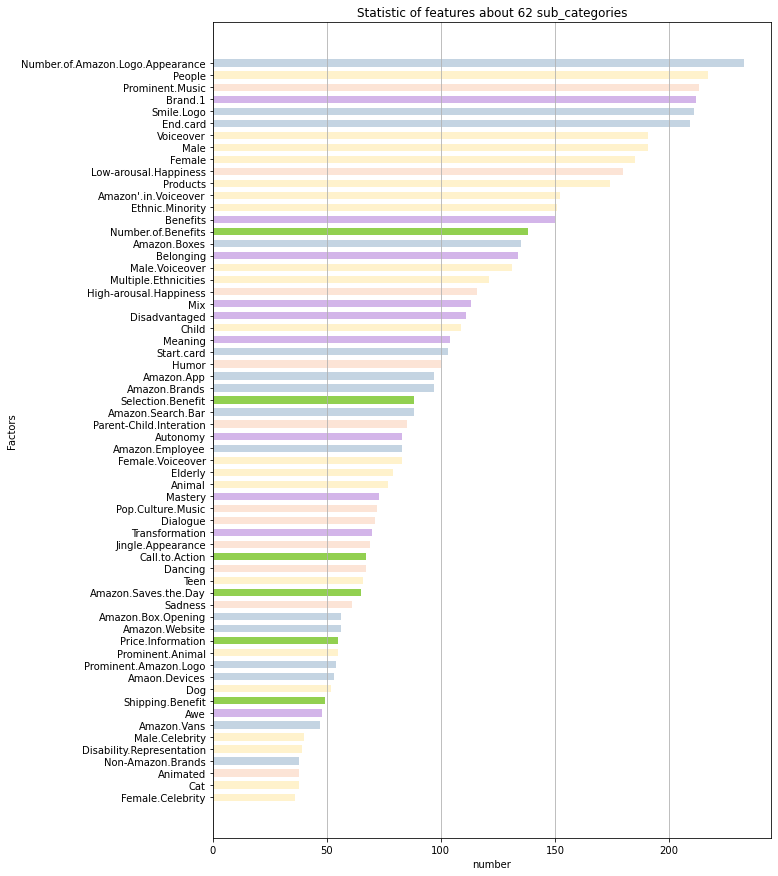

In [49]:

x = np.array(list(dic.keys()))
y = np.array(list(dic.values()))
plt.subplots(figsize=(10, 15))
plt.title("Statistic of features about 62 sub_categories")
plt.ylabel("Factors")
plt.xlabel("number")
plt.grid(axis='x')
plt.barh(x,y,height=0.6, color = color)
plt.savefig("./plots/statistic_sub_gategory.png")
plt.show()

## part2: Statistics of factors about five categories

In [108]:
Casting, Setting, Brand_cues, Messaging, Other = 0,0,0,0,0
for i in range(11,73):
    if i < 31:
        Casting = Casting + dic[df.columns[i]]
    if i >= 31 and i < 42:
        Setting = Setting + dic[df.columns[i]]
    if i >= 42 and i < 57:
        Brand_cues = Brand_cues + dic[df.columns[i]]
    if i >= 57 and i < 63:
        Messaging = Messaging + dic[df.columns[i]]
    if i >= 63 :
        Other = Other + dic[df.columns[i]]
category_dic = {"Casting": Casting, "Setting": Setting, "Brand_cues": Brand_cues, "Messaging": Messaging, "Other": Other}
category_dic = dict(sorted(category_dic.items(), key=lambda x:x[1], reverse=True))
category_dic

{'Casting': 2187,
 'Brand_cues': 1560,
 'Other': 1098,
 'Setting': 1072,
 'Messaging': 462}

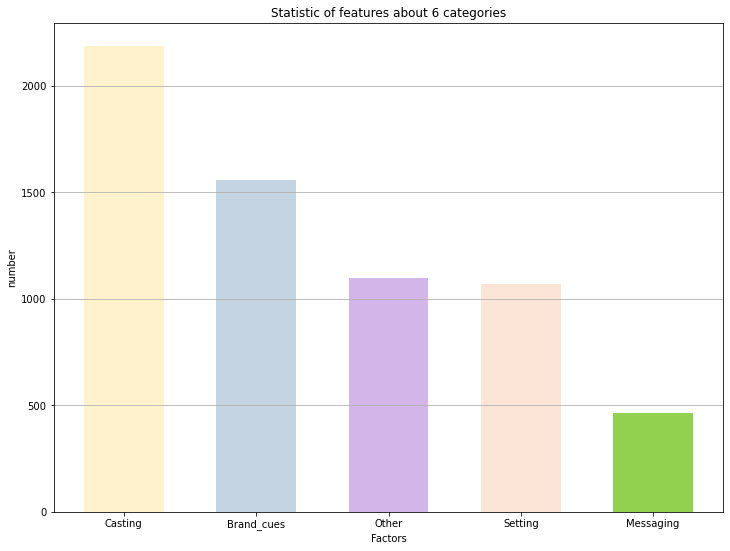

In [109]:
x = np.array(list(category_dic.keys()))
y = np.array(list(category_dic.values()))
plt.subplots(figsize=(12, 9))
plt.title("Statistic of features about 6 categories")
plt.xlabel("Factors")
plt.ylabel("number")
plt.grid(axis='y')
plt.bar(x,y,width=0.6, color = ["#FFF2CC", "#C4D4E2", "#D3B5E9", "#FCE4D6", "#92D050"])
plt.savefig("./plots/statistic_gategory.png")
plt.show()

## part3: Correlations between factors

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [4]:
df = pd.read_csv("./data/ads_2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 85 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                206 non-null    float64
 1   Brand                             206 non-null    object 
 2   Country                           206 non-null    object 
 3   Ad                                206 non-null    object 
 4   First.Run                         206 non-null    object 
 5   URL                               206 non-null    object 
 6   Launch/Pre                        206 non-null    object 
 7   ABX.ID                            206 non-null    float64
 8   Campaign.Flight.1                 206 non-null    object 
 9   Campaign.Flight.2                 17 non-null     object 
 10  Campaign.Flight.3                 2 non-null      object 
 11  People                            206 non-null    float64
 12  Female  

In [10]:
df.describe()

,ID,ABX.ID,People,Female,Male,Female.Celebrity,Male.Celebrity,Child,Teen,Elderly,...,Clear,Understood,Reputation,Relevant,See.Again,Like,Dislike,Purchase,Recommend,Branding.Correct.Recall
count,206.000000,2.060000e+02,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,...,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.00000,206.000000,206.000000
mean,132.398058,1.147292e+07,0.922330,0.766990,0.796117,0.043689,0.063107,0.398058,0.189320,0.252427,...,0.663738,0.716214,0.315534,0.591117,0.544223,0.446068,0.088544,0.15733,0.128689,0.358738
std,69.405045,3.335863e+06,0.268303,0.423778,0.403865,0.204901,0.243747,0.490690,0.392717,0.435463,...,0.104252,0.102077,0.109266,0.095806,0.107523,0.129658,0.044850,0.04925,0.044489,0.081381
min,1.000000,7.391804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.360000,0.360000,0.070000,0.370000,0.290000,0.160000,0.010000,0.05000,0.040000,0.000000
25%,79.500000,8.448599e+06,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.600000,0.660000,0.232500,0.530000,0.472500,0.360000,0.060000,0.12000,0.100000,0.300000
50%,136.500000,9.823180e+06,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.670000,0.730000,0.290000,0.575000,0.530000,0.430000,0.080000,0.15000,0.130000,0.350000
75%,192.750000,1.519344e+07,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.750000,...,0.740000,0.790000,0.400000,0.660000,0.630000,0.540000,0.110000,0.19000,0.160000,0.410000
max,244.000000,2.001743e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.870000,0.950000,0.600000,0.830000,0.780000,0.730000,0.240000,0.31000,0.250000,0.620000


array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'ABX.ID'}>,
        <AxesSubplot:title={'center':'People'}>,
        <AxesSubplot:title={'center':'Female'}>,
        <AxesSubplot:title={'center':'Male'}>,
        <AxesSubplot:title={'center':'Female.Celebrity'}>,
        <AxesSubplot:title={'center':'Male.Celebrity'}>,
        <AxesSubplot:title={'center':'Child'}>,
        <AxesSubplot:title={'center':'Teen'}>],
       [<AxesSubplot:title={'center':'Elderly'}>,
        <AxesSubplot:title={'center':'Multiple.Ethnicities'}>,
        <AxesSubplot:title={'center':'Ethnic.Minority'}>,
        <AxesSubplot:title={'center':'Disability.Representation'}>,
        <AxesSubplot:title={'center':'Animal'}>,
        <AxesSubplot:title={'center':'Dog'}>,
        <AxesSubplot:title={'center':'Cat'}>,
        <AxesSubplot:title={'center':'Prominent.Animal'}>,
        <AxesSubplot:title={'center':'Voiceover'}>],
       [<AxesSubplot:title={'center':'Female.Voiceover'}>

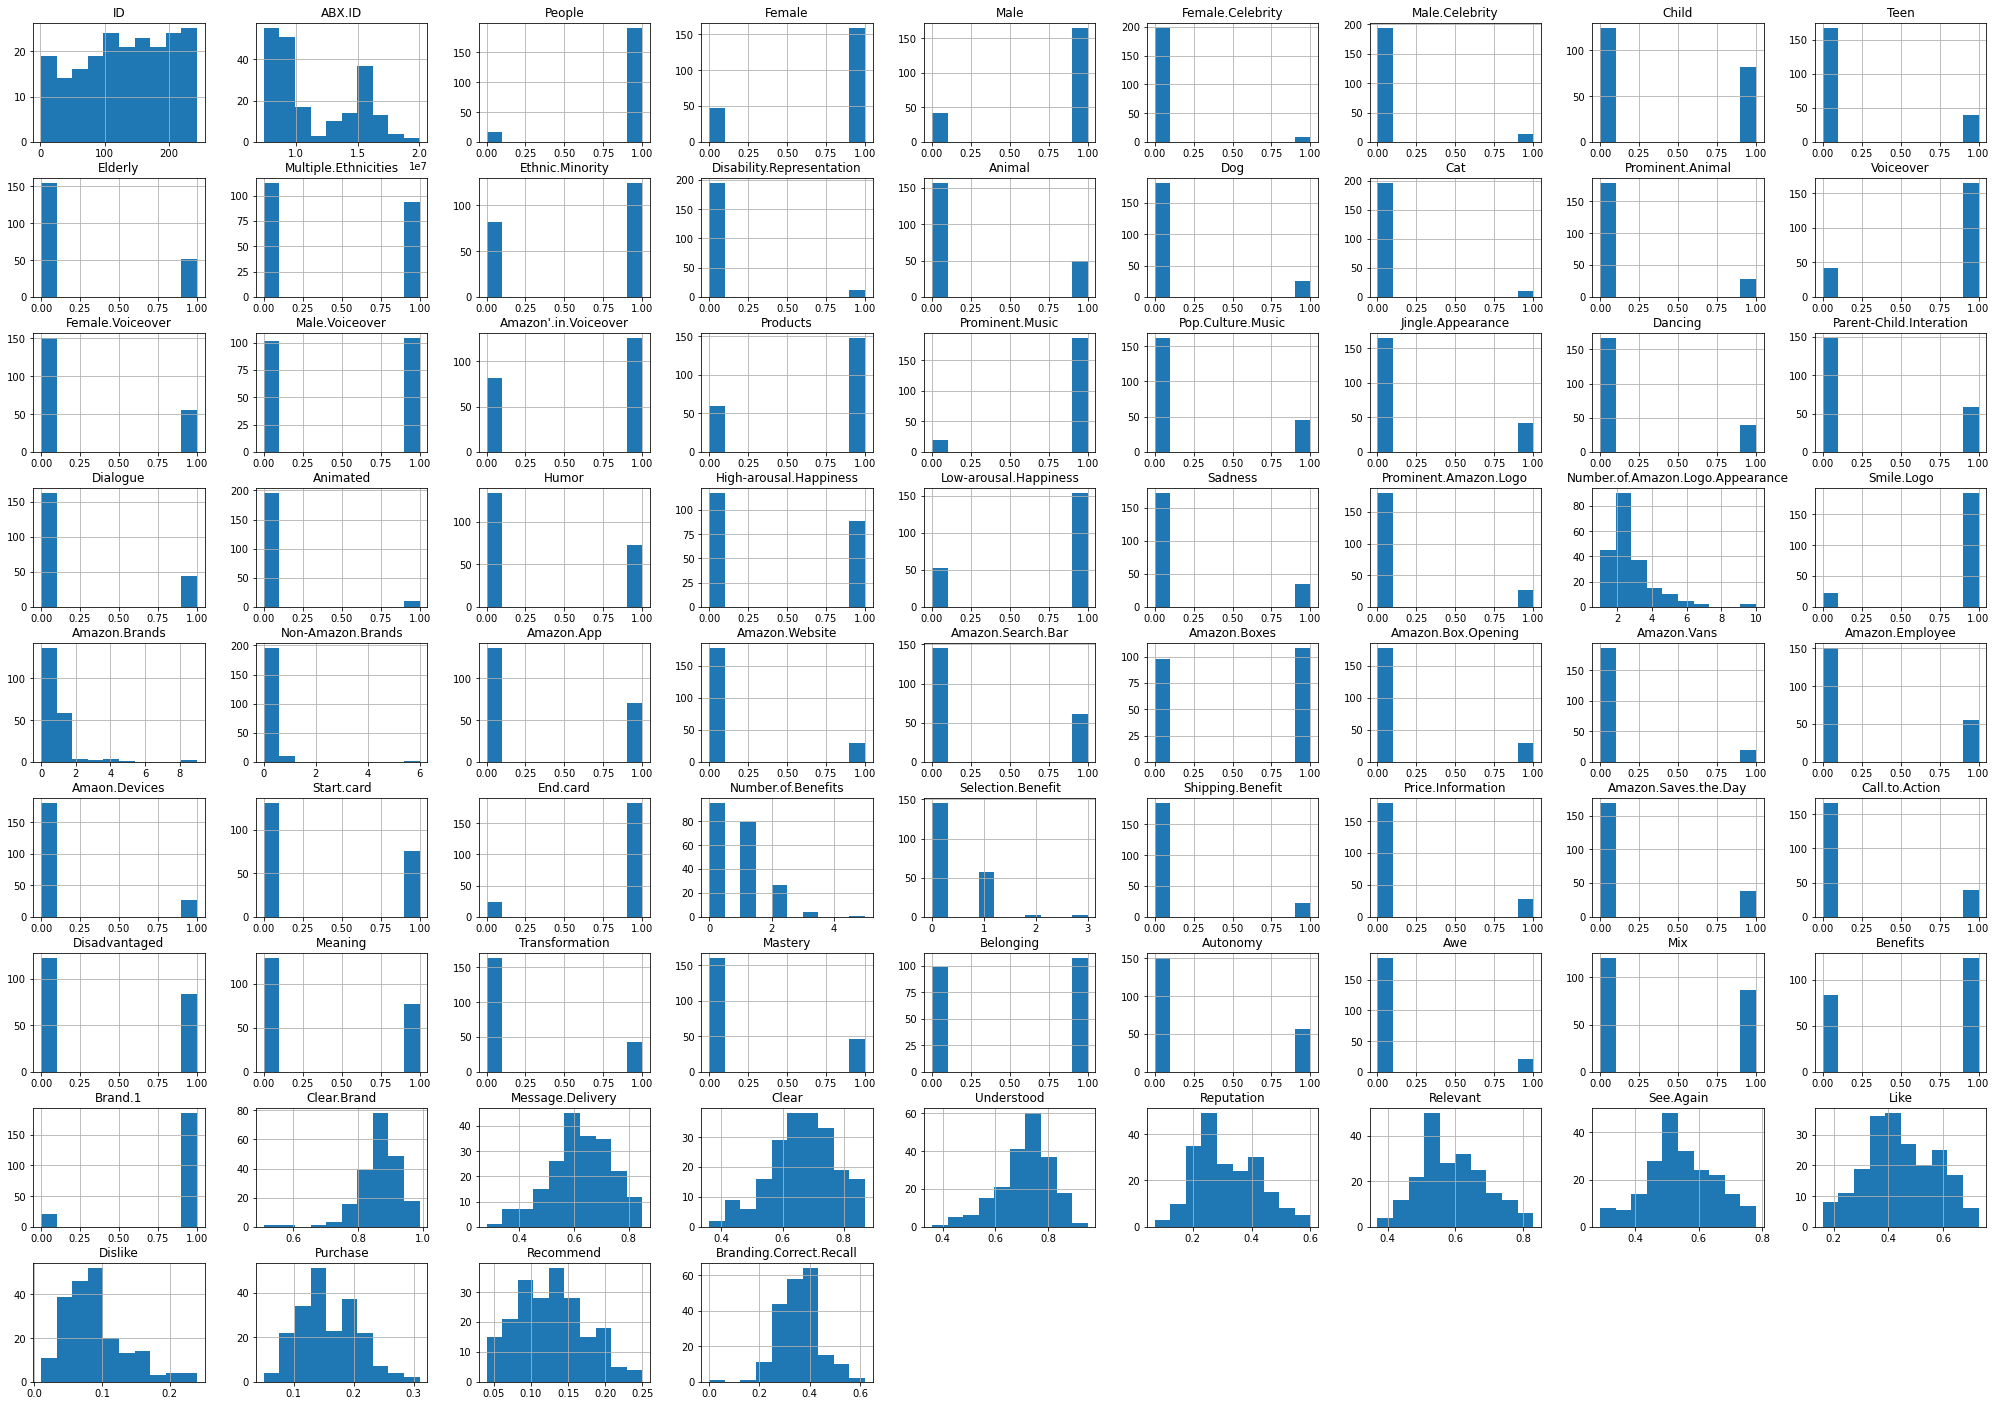

In [11]:
df.hist(figsize=(35,25)) # 每个特征的数量统计

可视化：特征和目标之间的相关性
一共62个特征 ————》12个目标值

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 85 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                206 non-null    float64
 1   Brand                             206 non-null    object 
 2   Country                           206 non-null    object 
 3   Ad                                206 non-null    object 
 4   First.Run                         206 non-null    object 
 5   URL                               206 non-null    object 
 6   Launch/Pre                        206 non-null    object 
 7   ABX.ID                            206 non-null    float64
 8   Campaign.Flight.1                 206 non-null    object 
 9   Campaign.Flight.2                 17 non-null     object 
 10  Campaign.Flight.3                 2 non-null      object 
 11  People                            206 non-null    float64
 12  Female  

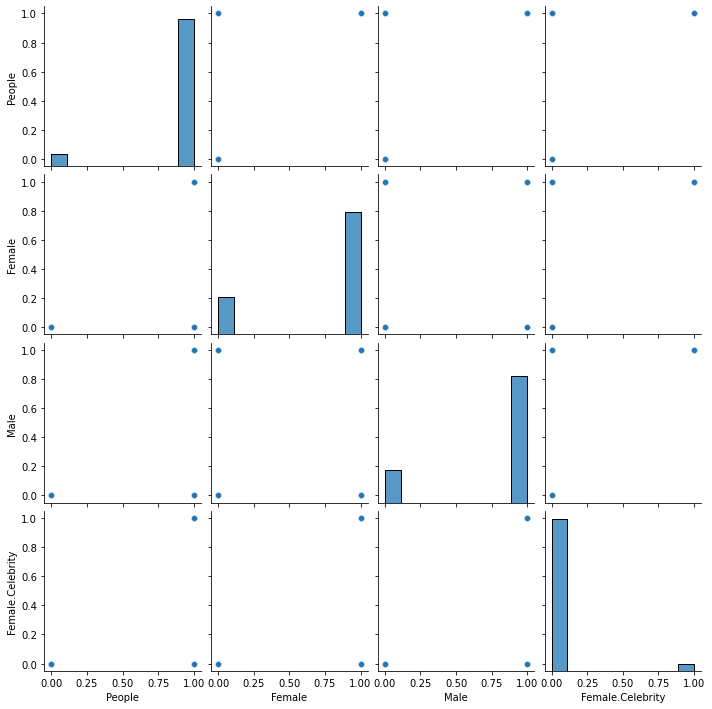

In [5]:
sns.pairplot(df[df.columns[11:15]])  #显示变量之间两两关系

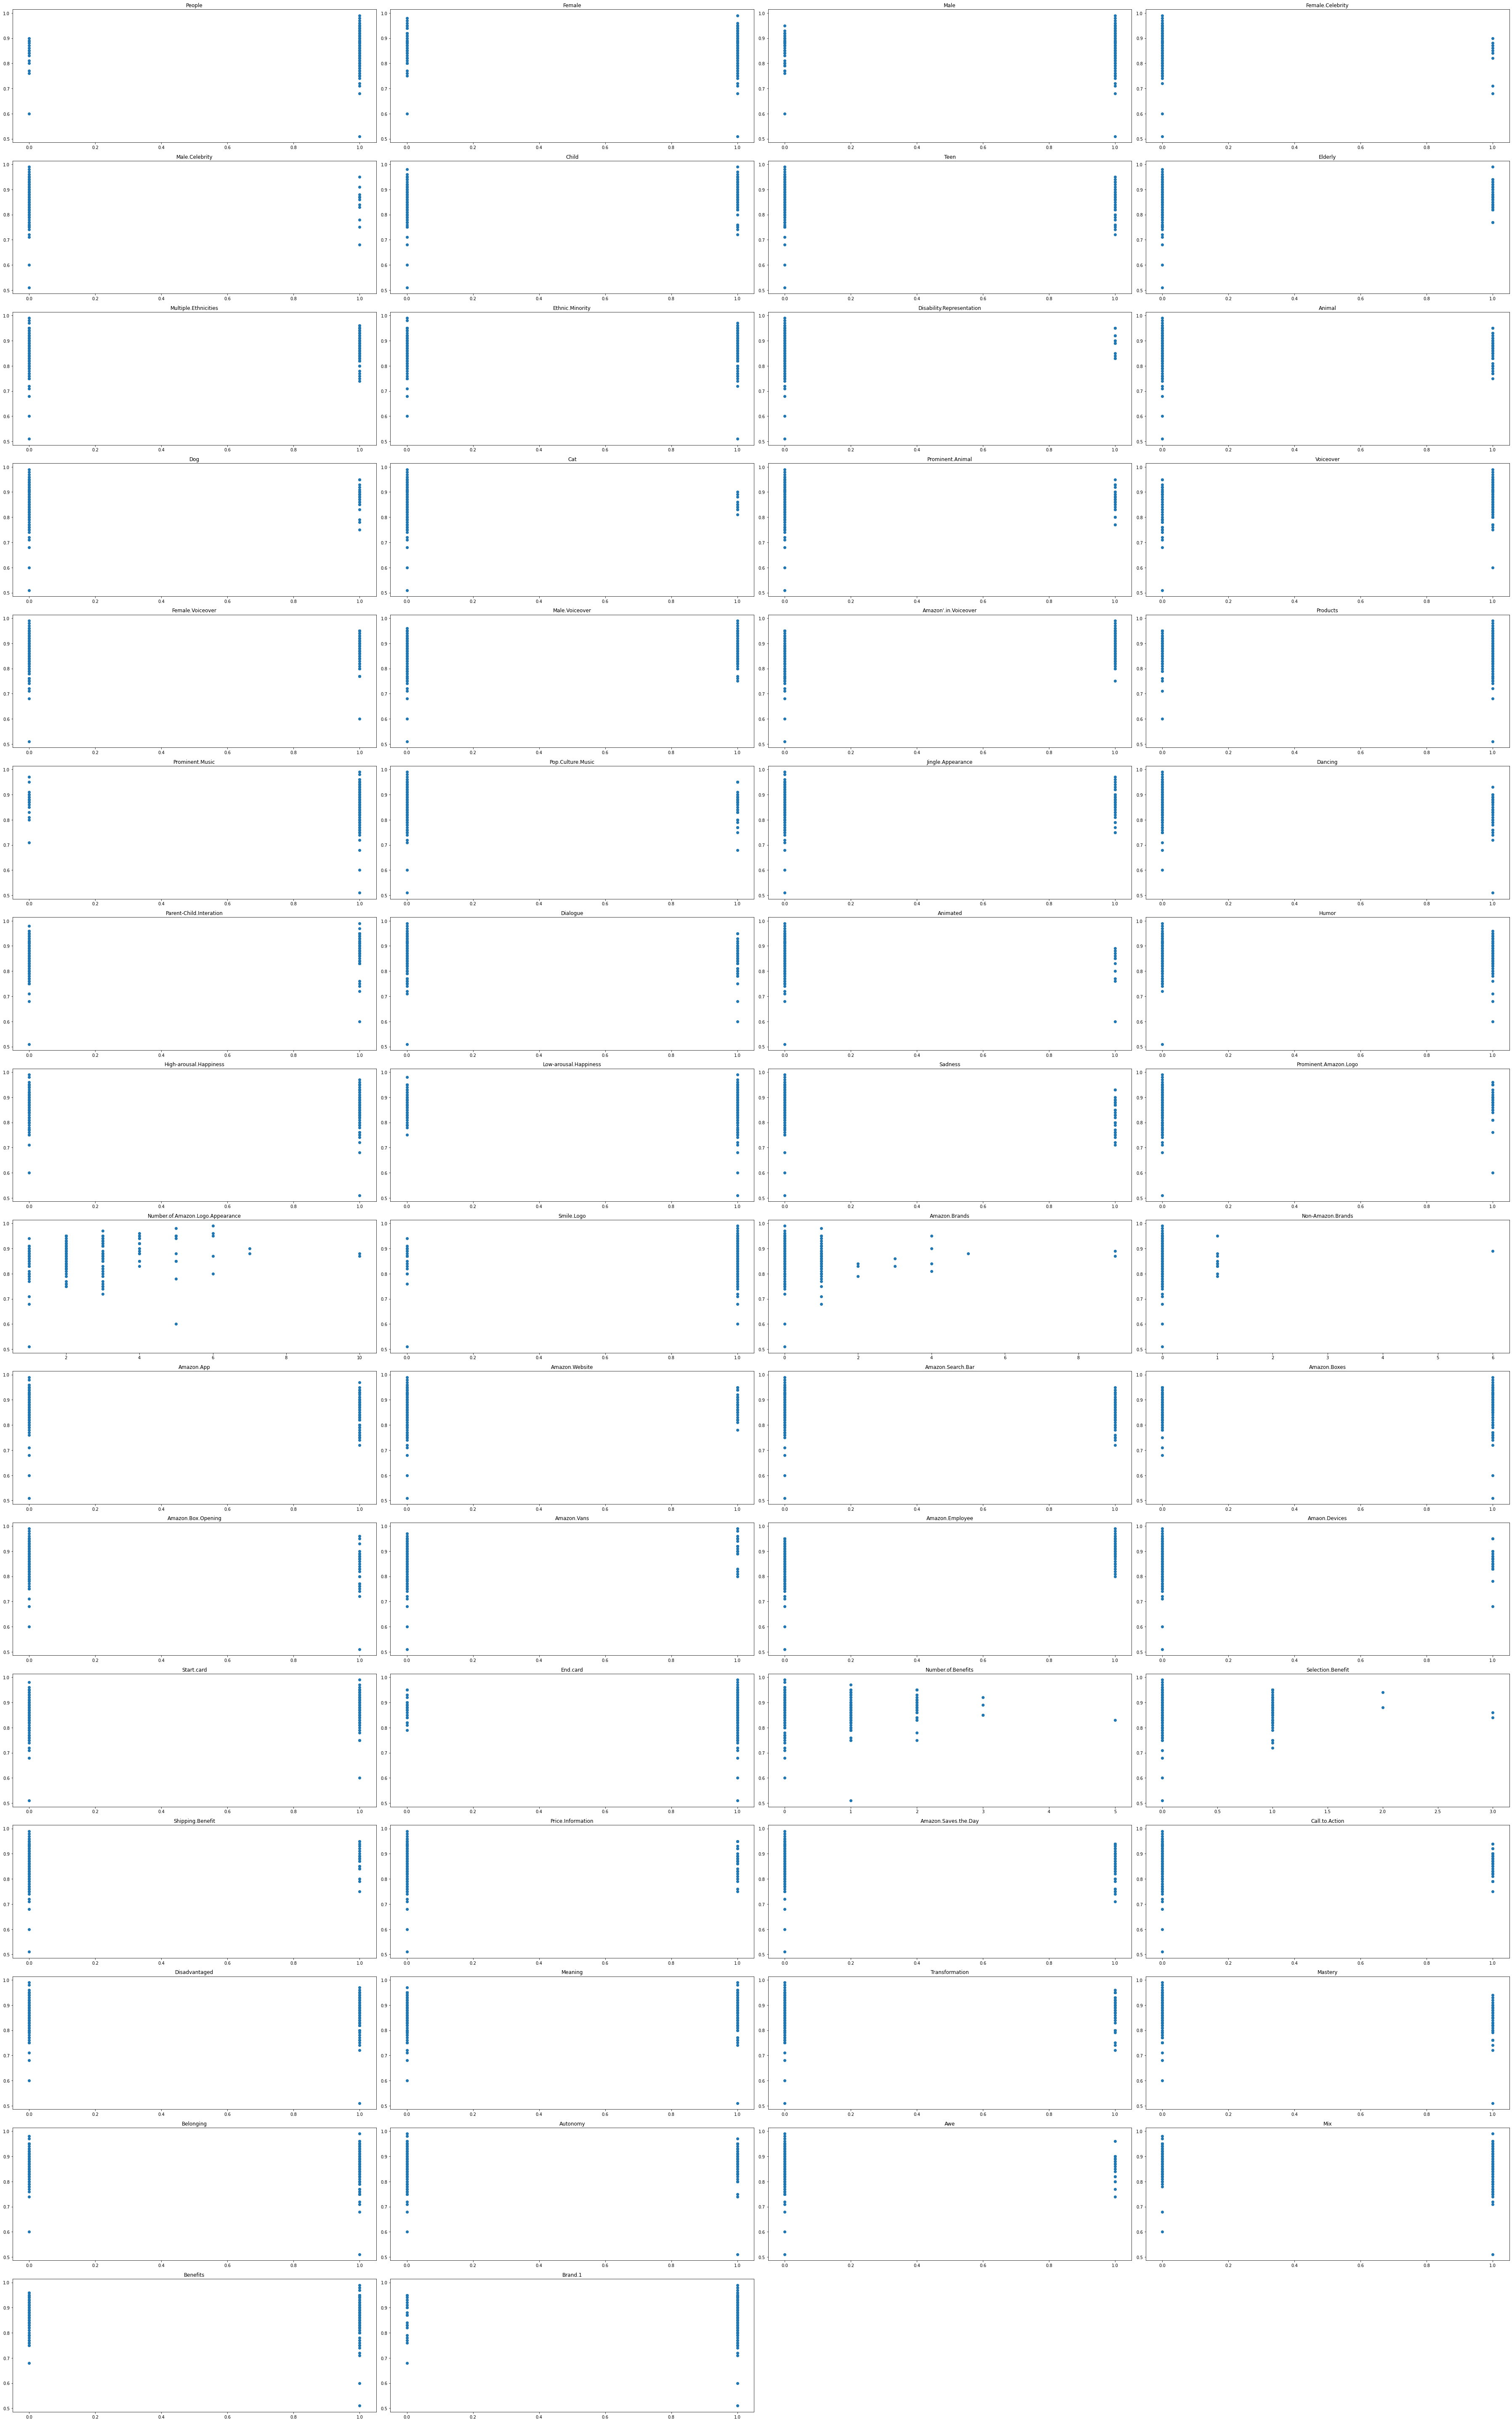

In [ ]:
# 每个特征与目标值的散点图，看两者之间是否存在规律性


cols = 4
rows = math.ceil(62 / 4)

plt.figure(figsize = (50,80))

for idx in range(62):
    plt.subplot(rows, cols, idx+1)
    plt.scatter(df[df.columns[idx+11]], df["Clear.Brand"])
    plt.title(df.columns[idx+11])
plt.tight_layout()


统计学，相关系数

<AxesSubplot:>

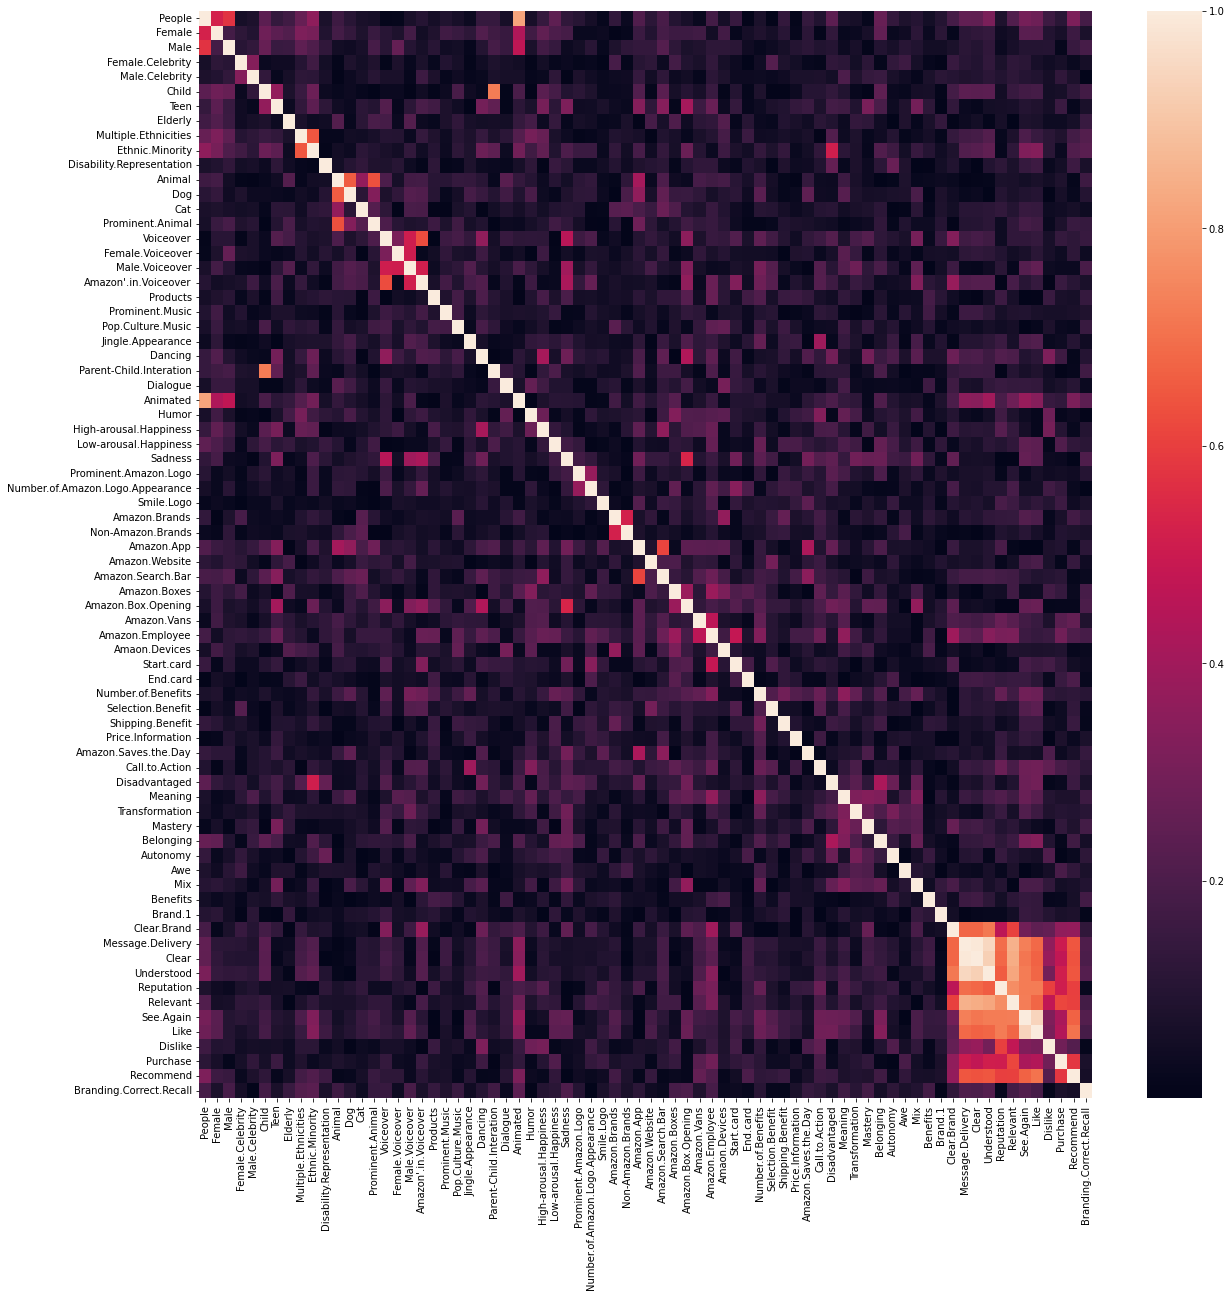

In [ ]:
pd.options.display.float_format = '{:,.3f}'.format ## 指定小数位数
corr = df[df.columns[11:]].corr().abs()
df[df.columns[11:]].corr().abs().to_csv("./data/correlations.csv") #相关系数保存到csv中

# 绘制热力图
plt.figure(figsize=(20,20))
sns.heatmap(corr)


## part4. Statistic the distribution of 12 targets

In [185]:
df = pd.read_csv("./data/ads_3.csv")

X = df[df.columns[:62]]
Y = df[df.columns[62:]]

In [186]:
Y_array = np.array(Y).T

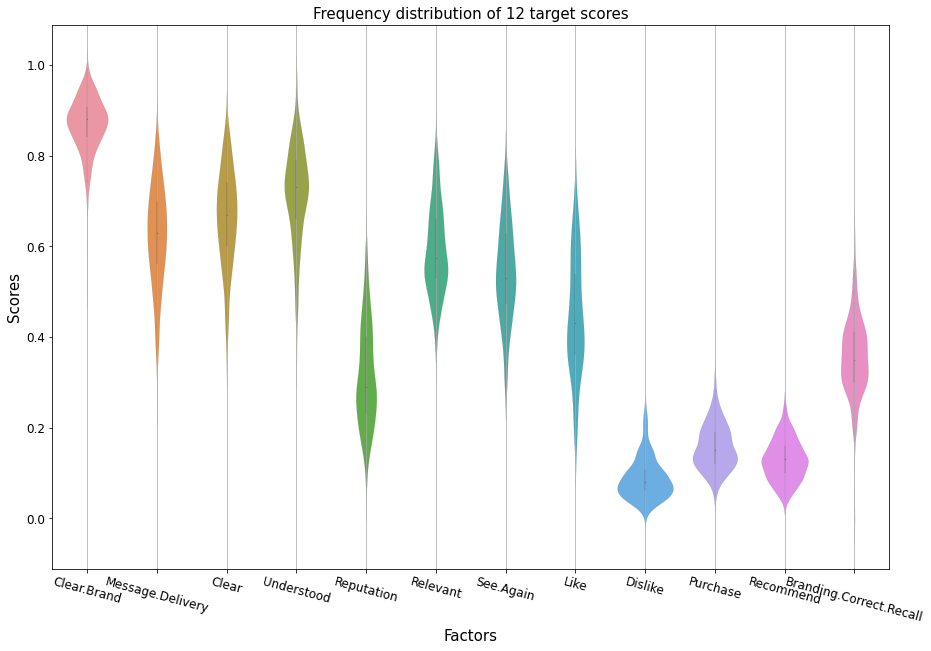

In [190]:
plt.figure(figsize = (15,10))
plt.title("Frequency distribution of 12 target scores", fontproperties={"size":15})
plt.xlabel("Factors", fontproperties={"size":15})
plt.ylabel("Scores", fontproperties={"size":15})
plt.xticks(fontsize=12, rotation=-15)  # 设置x轴刻度字体大小
plt.yticks(fontsize=12)  # 设置y轴刻度字体大小

sns.violinplot(data=Y, linewidth=0.1)
plt.grid(axis='x')
plt.savefig("./plots/Probability_density_statistics.png")
plt.show()

# Analyze results of three regression models applied in predicting ads effectiveness 

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import xticks,yticks,np

## Part1. Analyze the result of SVM_Regression

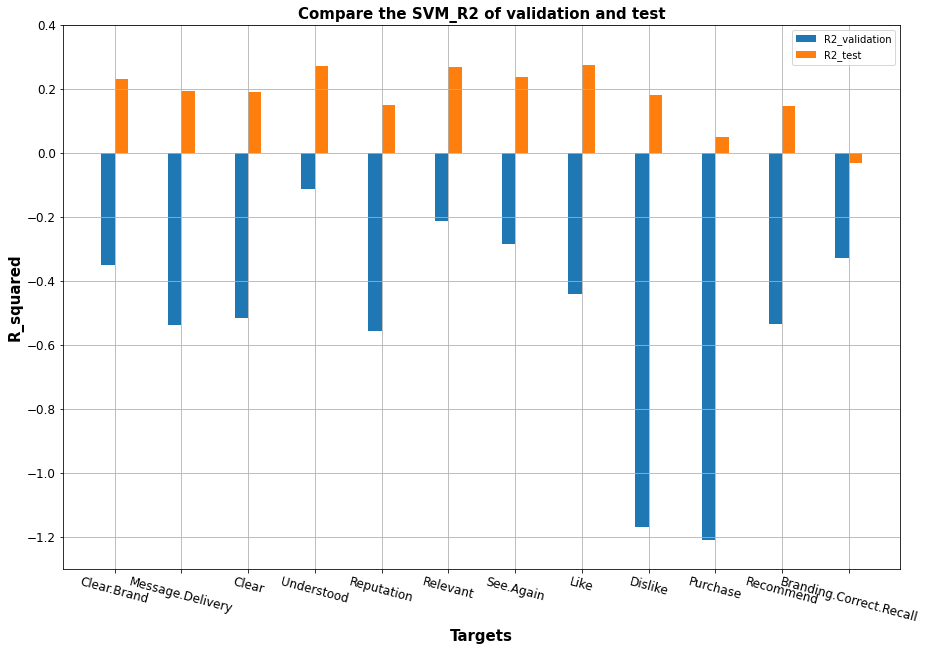

In [175]:
SVM_df = pd.read_csv("./result/SVM_regression.csv")
# DT_df = pd.read_csv("./result/DT_regression.csv")
# RF_df = pd.read_csv("./result/RF_regression.csv")
labels = np.array(list(SVM_df["Target"]))
x = np.array(range(12))

y_vali_1 = np.array(list(SVM_df["R_squared_validation"]))
y_test_1 = np.array(list(SVM_df["R_squared_test"]))

# y_DT = np.array(list(DT_df["R_squared"]))
# y_RF = np.array(list(RF_df["R_squared_oob"]))

fig = plt.figure(figsize=(15, 10))
plt.bar(x-0.1, y_vali_1, label="R2_validation", width=0.2)
plt.bar(x+0.1, y_test_1, label="R2_test", width=0.2)


plt.title("Compare the SVM_R2 of validation and test", fontproperties={"size":15}, weight="bold")
plt.xlabel("Targets", fontproperties={"size":15}, weight="bold")
plt.ylabel("R_squared", fontproperties={"size":15}, weight="bold")
plt.xticks(fontproperties={"size":12}, ticks=x, labels=labels, rotation=-15)  # 设置x轴刻度字体大小
plt.yticks(fontproperties={"size":12})  # 设置y轴刻度字体大小
plt.ylim(-1.3, 0.4)
plt.grid()
plt.legend()
plt.savefig('./plots/SVM_R2_contrast.png')
plt.show()

## Part2. Analyze the result of DT_Regression

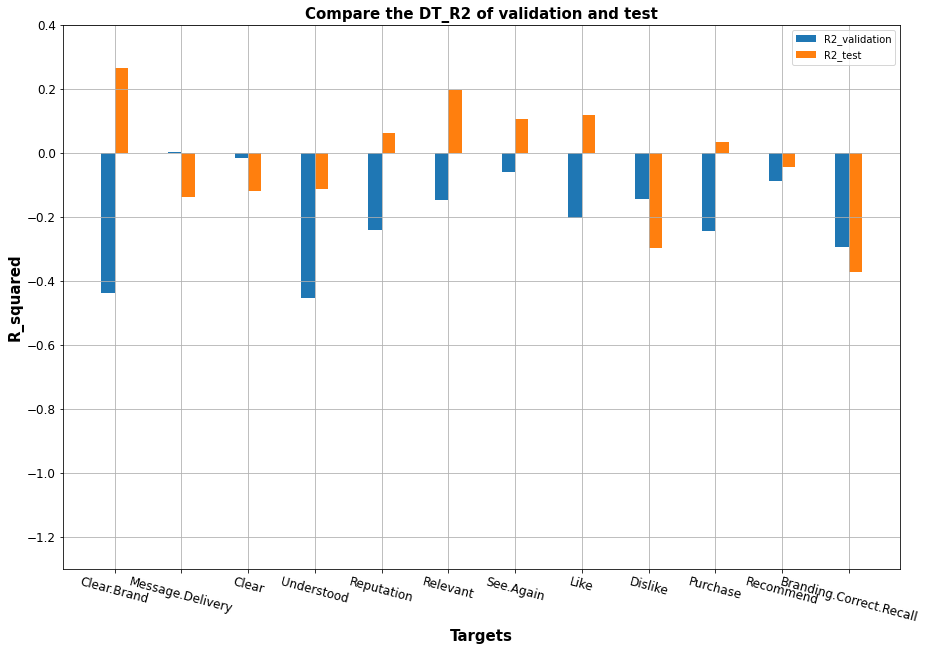

In [176]:
DT_df = pd.read_csv("./result/DT_optimized_regression.csv")

labels = np.array(list(DT_df["Target"]))
x = np.array(range(12))

y_vali_2 = np.array(list(DT_df["R_squared_validation"]))
y_test_2 = np.array(list(DT_df["R_squared_test"]))



fig = plt.figure(figsize=(15,10))
plt.bar(x-0.1, y_vali_2, label="R2_validation", width=0.2)
plt.bar(x+0.1, y_test_2, label="R2_test", width=0.2)


plt.title("Compare the DT_R2 of validation and test", fontproperties={"size":15}, weight="bold")
plt.xlabel("Targets", fontproperties={"size":15}, weight="bold")
plt.ylabel("R_squared", fontproperties={"size":15}, weight="bold")
plt.xticks(fontproperties={"size":12}, ticks=x, labels=labels, rotation=-15)  # 设置x轴刻度字体大小
plt.yticks(fontproperties={"size":12})  # 设置y轴刻度字体大小
plt.ylim(-1.3, 0.4)

plt.grid()
plt.legend()
plt.savefig('./plots/DT_R2_contrast.png')
plt.show()

## Part3. Analyze the result of RF_Regression

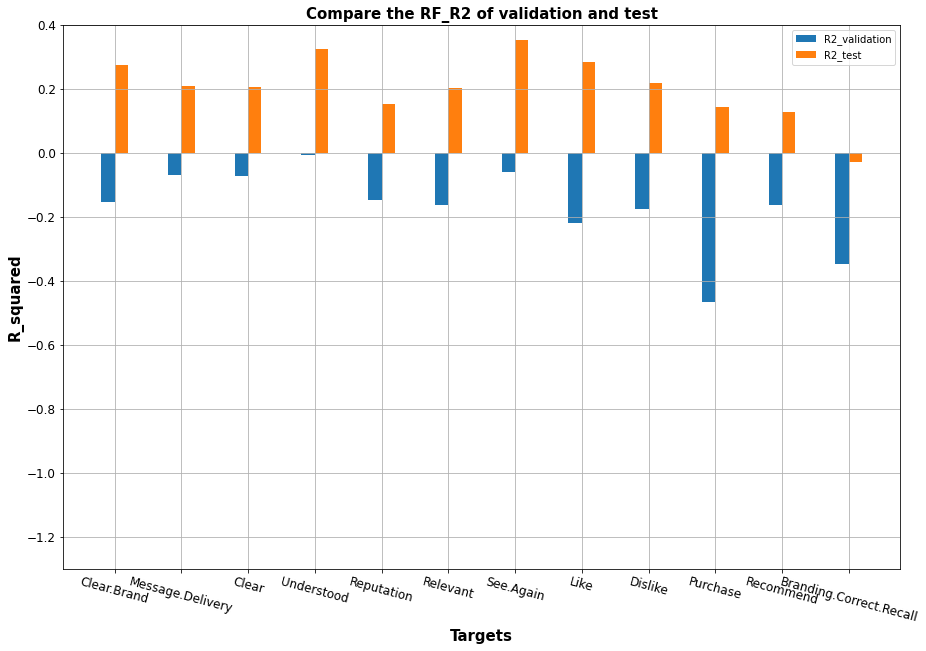

In [177]:
RF_df = pd.read_csv("./result/RF_optimized_regression.csv")

labels = np.array(list(RF_df["Target"]))
x = np.array(range(12))

y_vali_3 = np.array(list(RF_df["R_squared_validation"]))
y_test_3 = np.array(list(RF_df["R_squared_test"]))



fig = plt.figure(figsize=(15,10))
plt.bar(x-0.1, y_vali_3, label="R2_validation", width=0.2)
plt.bar(x+0.1, y_test_3, label="R2_test", width=0.2)


plt.title("Compare the RF_R2 of validation and test", fontproperties={"size":15}, weight="bold")
plt.xlabel("Targets", fontproperties={"size":15}, weight="bold")
plt.ylabel("R_squared", fontproperties={"size":15}, weight="bold")
plt.xticks(fontproperties={"size":12}, ticks=x, labels=labels, rotation=-15)  # 设置x轴刻度字体大小
plt.yticks(fontproperties={"size":12})  # 设置y轴刻度字体大小
plt.ylim(-1.3, 0.4)
plt.grid()
plt.legend()
plt.savefig('./plots/RF_R2_contrast.png')
plt.show()

## Part4. compare three Regression

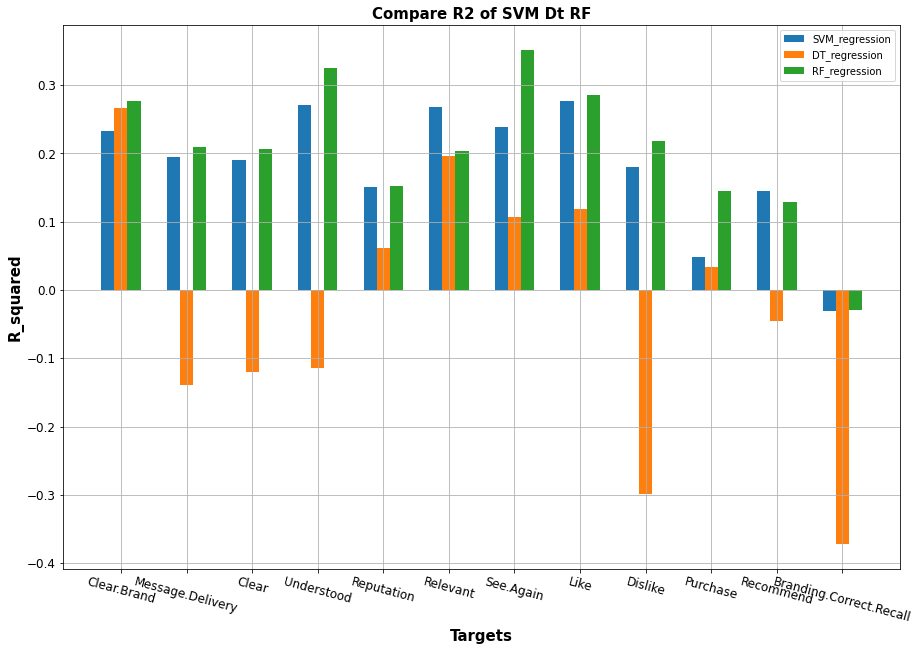

In [179]:

fig = plt.figure(figsize=(15,10))
plt.bar(x-0.2, y_test_1, label="SVM_regression", width=0.2)
plt.bar(x, y_test_2, label="DT_regression", width=0.2)
plt.bar(x+0.2, y_test_3, label="RF_regression", width=0.2)

plt.title("Compare R2 of SVM Dt RF", fontproperties={"size":15}, weight="bold")
plt.xlabel("Targets", fontproperties={"size":15}, weight="bold")
plt.ylabel("R_squared", fontproperties={"size":15}, weight="bold")
plt.xticks(fontproperties={"size":12}, ticks=x, labels=labels, rotation=-15)  # 设置x轴刻度字体大小
plt.yticks(fontproperties={"size":12})  # 设置y轴刻度字体大小
# plt.ylim(-1.3, 0.4)


plt.grid()
plt.legend()
plt.savefig('./plots/R_squared_contrast.png')
plt.show()

## Part5. Analyze the result of SVM_Classification

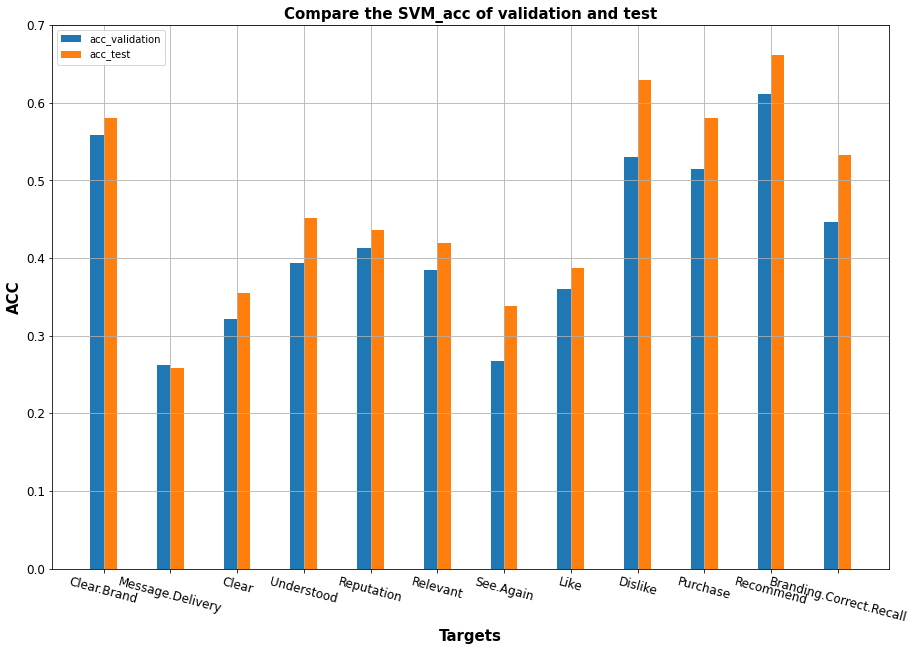

In [180]:
SVM_df = pd.read_csv("./result/SVM_classification.csv")
# DT_df = pd.read_csv("./result/DT_regression.csv")
# RF_df = pd.read_csv("./result/RF_regression.csv")
labels = np.array(list(SVM_df["Target"]))
x = np.array(range(12))

y_vali_1 = np.array(list(SVM_df["acc_validation"]))
y_test_1 = np.array(list(SVM_df["acc_test"]))

# y_DT = np.array(list(DT_df["R_squared"]))
# y_RF = np.array(list(RF_df["R_squared_oob"]))

fig = plt.figure(figsize=(15,10))
plt.bar(x-0.1, y_vali_1, label="acc_validation", width=0.2)
plt.bar(x+0.1, y_test_1, label="acc_test", width=0.2)


plt.title("Compare the SVM_acc of validation and test", fontproperties={"size":15}, weight="bold")
plt.xlabel("Targets", fontproperties={"size":15}, weight="bold")
plt.ylabel("ACC", fontproperties={"size":15}, weight="bold")
plt.xticks(fontproperties={"size":12}, ticks=x, labels=labels, rotation=-15)  # 设置x轴刻度字体大小
plt.yticks(fontproperties={"size":12})  # 设置y轴刻度字体大小
plt.ylim(0,0.7)
plt.grid()
plt.legend()
plt.savefig('./plots/SVM_acc_contrast.png')
plt.show()

## Part6. Analyze the result of DT_Classification

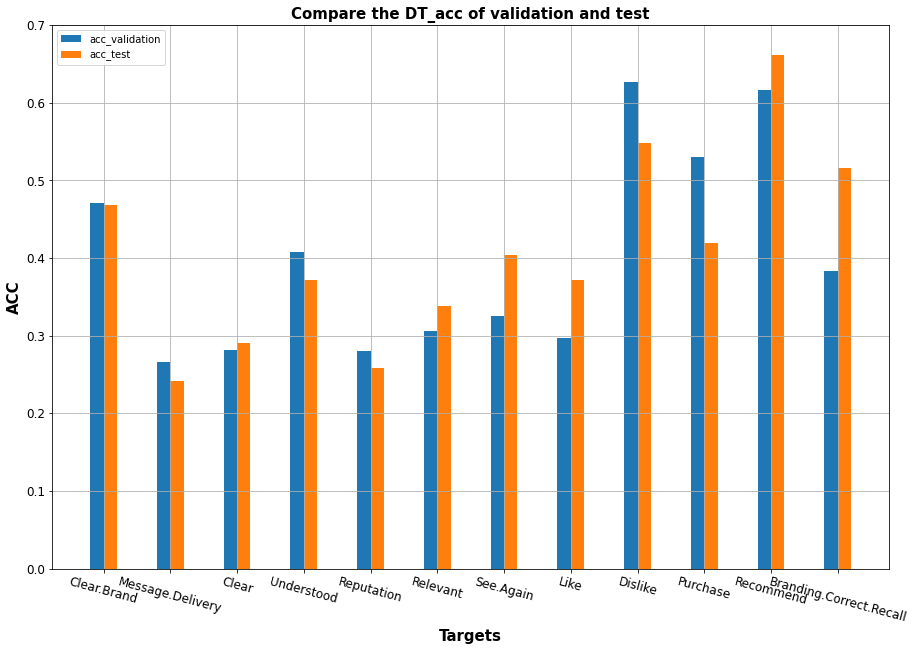

In [181]:
DT_df = pd.read_csv("./result/DT_optimized_classification.csv")

labels = np.array(list(DT_df["Target"]))
x = np.array(range(12))

y_vali_2 = np.array(list(DT_df["acc_validation"]))
y_test_2 = np.array(list(DT_df["acc_test"]))



fig = plt.figure(figsize=(15,10))
plt.bar(x-0.1, y_vali_2, label="acc_validation", width=0.2)
plt.bar(x+0.1, y_test_2, label="acc_test", width=0.2)


plt.title("Compare the DT_acc of validation and test", fontproperties={"size":15}, weight="bold")
plt.xlabel("Targets", fontproperties={"size":15}, weight="bold")
plt.ylabel("ACC", fontproperties={"size":15}, weight="bold")
plt.xticks(fontproperties={"size":12}, ticks=x, labels=labels, rotation=-15)  # 设置x轴刻度字体大小
plt.yticks(fontproperties={"size":12})  # 设置y轴刻度字体大小
plt.ylim(0,0.7)
plt.grid()
plt.legend()
plt.savefig('./plots/DT_acc_contrast.png')
plt.show()

## Part7. Analyze the result of RF_Classification

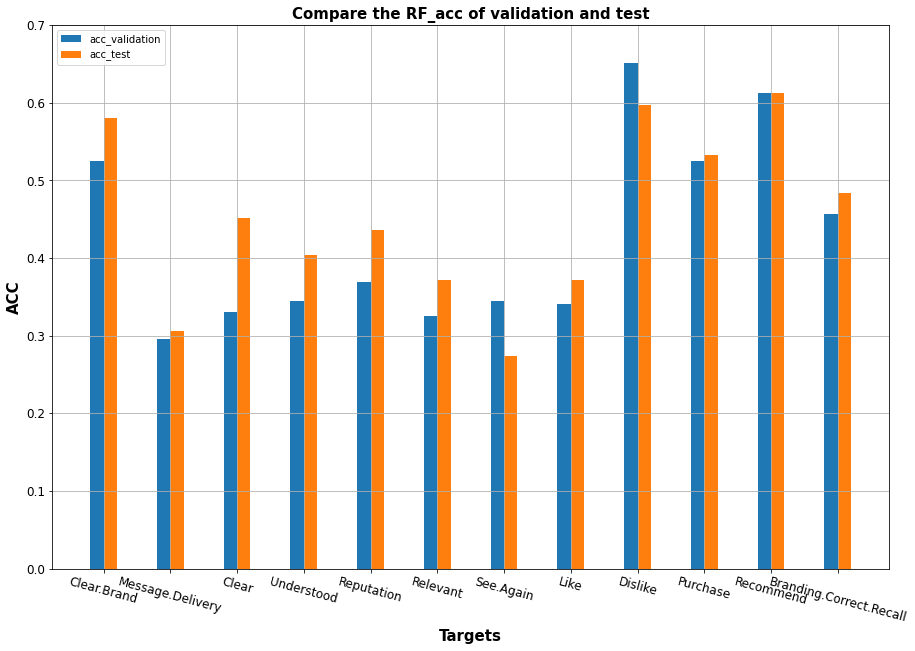

In [182]:
RF_df = pd.read_csv("./result/RF_optimized_classification.csv")

labels = np.array(list(RF_df["Target"]))
x = np.array(range(12))

y_vali_3 = np.array(list(RF_df["acc_validation"]))
y_test_3 = np.array(list(RF_df["acc_test"]))



fig = plt.figure(figsize=(15,10))
plt.bar(x-0.1, y_vali_3, label="acc_validation", width=0.2)
plt.bar(x+0.1, y_test_3, label="acc_test", width=0.2)


plt.title("Compare the RF_acc of validation and test", fontproperties={"size":15}, weight="bold")
plt.xlabel("Targets", fontproperties={"size":15}, weight="bold")
plt.ylabel("ACC", fontproperties={"size":15}, weight="bold")
plt.xticks(fontproperties={"size":12}, ticks=x, labels=labels, rotation=-15)  # 设置x轴刻度字体大小
plt.yticks(fontproperties={"size":12})  # 设置y轴刻度字体大小
plt.ylim(0,0.7)
plt.grid()
plt.legend(loc="upper left")
plt.savefig('./plots/RF_acc_contrast.png')
plt.show()

## prat8 Compare three Classifications

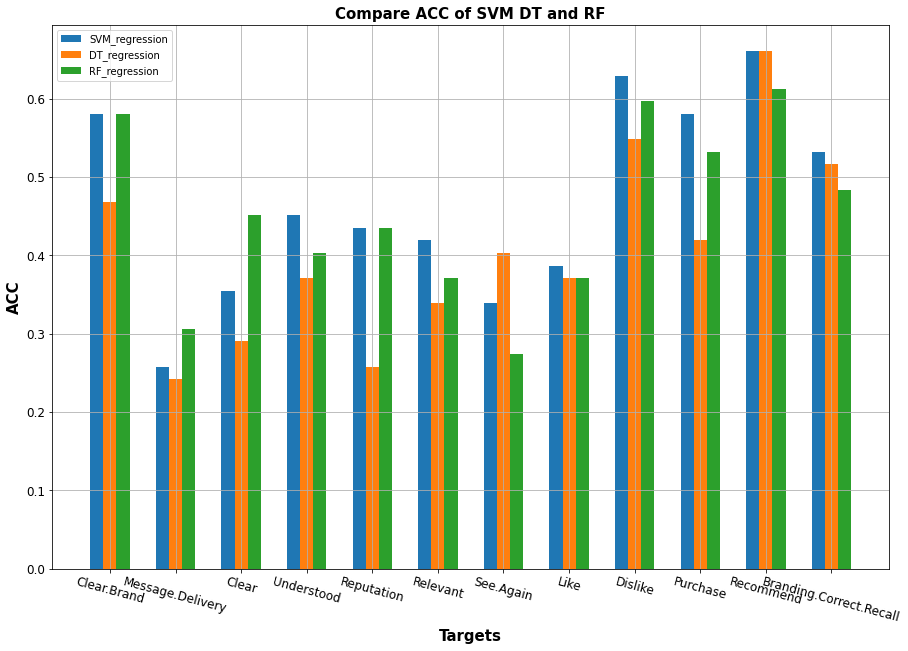

In [184]:

fig = plt.figure(figsize=(15,10))
plt.bar(x-0.2, y_test_1, label="SVM_regression", width=0.2)
plt.bar(x, y_test_2, label="DT_regression", width=0.2)
plt.bar(x+0.2, y_test_3, label="RF_regression", width=0.2)

plt.title("Compare ACC of SVM DT and RF", fontproperties={"size":15}, weight="bold")
plt.xlabel("Targets", fontproperties={"size":15}, weight="bold")
plt.ylabel("ACC", fontproperties={"size":15}, weight="bold")
plt.xticks(fontproperties={"size":12}, ticks=x, labels=labels, rotation=-15)  # 设置x轴刻度字体大小
plt.yticks(fontproperties={"size":12})  # 设置y轴刻度字体大小
# plt.ylim(-1.3, 0.4)


plt.grid()
plt.legend()
plt.savefig('./plots/ACC_contrast.png')
plt.show()